# Edge Detection Tutorial (Part 1)
This notebook demonstrates the concepts of edge detection from your lecture notes using Python and OpenCV.

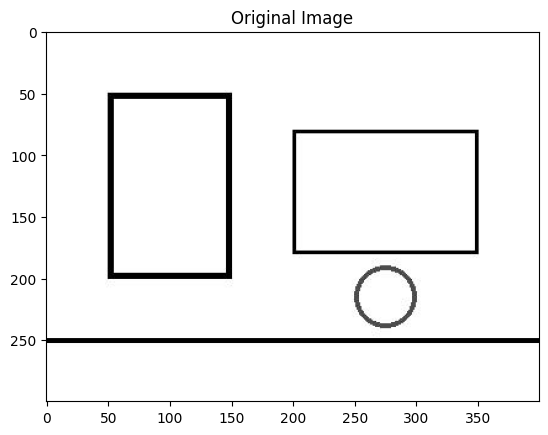

In [3]:
import cv2 # type: ignore
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('edge_example_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

## Sobel Gradient Computation

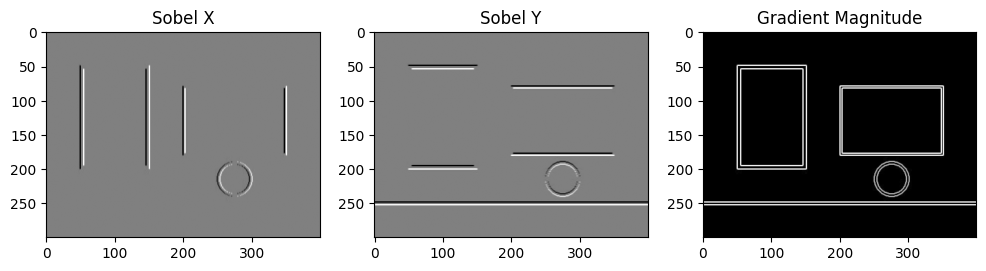

In [4]:
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gx**2 + gy**2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gx, cmap='gray'); plt.title('Sobel X')
plt.subplot(1,3,2); plt.imshow(gy, cmap='gray'); plt.title('Sobel Y')
plt.subplot(1,3,3); plt.imshow(grad_mag, cmap='gray'); plt.title('Gradient Magnitude')
plt.show()

## Gaussian Smoothing + Gradient

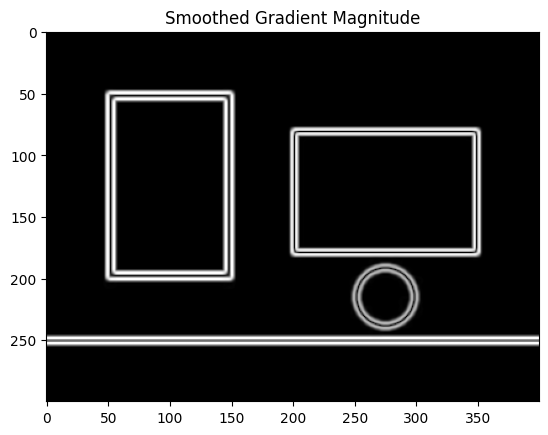

In [5]:
blur = cv2.GaussianBlur(img, (5,5), 1.4)
gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gx**2 + gy**2)

plt.imshow(grad_mag, cmap='gray')
plt.title('Smoothed Gradient Magnitude')
plt.show()

## Canny Edge Detection

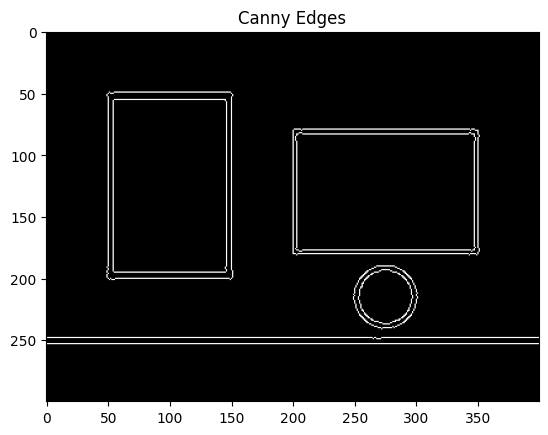

In [6]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()

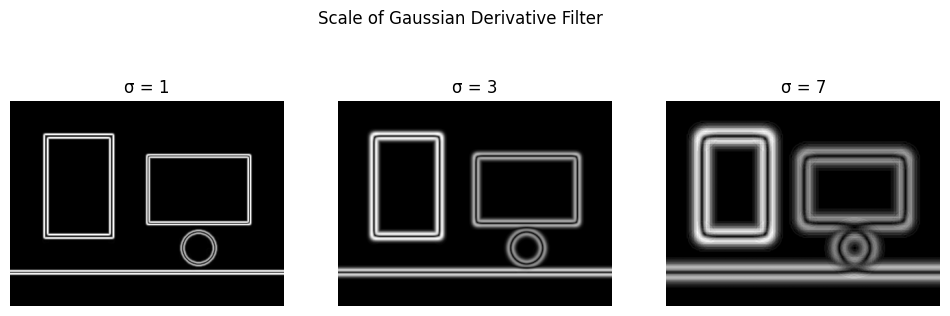

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('edge_example_image.jpg', cv2.IMREAD_GRAYSCALE)

sigmas = [1, 3, 7]
plt.figure(figsize=(12,4))

for i, sigma in enumerate(sigmas):
    # Gaussian smoothing
    blur = cv2.GaussianBlur(img, (0,0), sigma)
    # Sobel derivative after smoothing (Derivative of Gaussian)
    gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
    grad_mag = np.sqrt(gx**2 + gy**2)
    
    plt.subplot(1, len(sigmas), i+1)
    plt.imshow(grad_mag, cmap='gray')
    plt.title(f'σ = {sigma}')
    plt.axis('off')

plt.suptitle('Scale of Gaussian Derivative Filter')
plt.show()


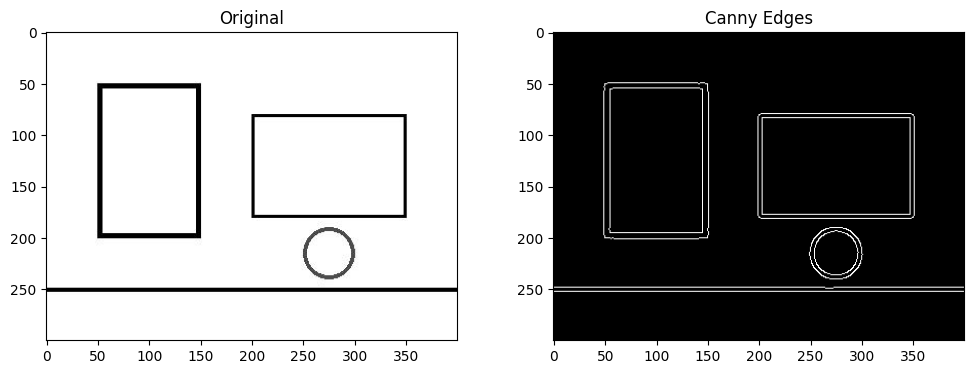

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('edge_example_image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Gaussian Blur
blur = cv2.GaussianBlur(img, (5,5), 1.4)

# Step 2–5: Canny Edge Detection
edges = cv2.Canny(blur, threshold1=100, threshold2=200)

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Canny Edges")
plt.show()


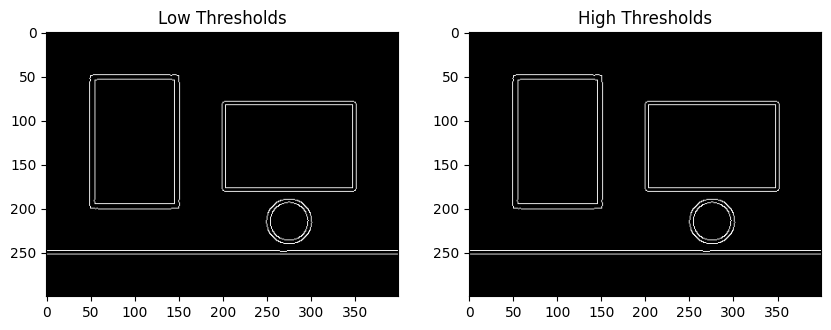

In [9]:
edges_low = cv2.Canny(blur, 50, 100)
edges_high = cv2.Canny(blur, 150, 250)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(edges_low, cmap='gray'); plt.title("Low Thresholds")
plt.subplot(1,2,2); plt.imshow(edges_high, cmap='gray'); plt.title("High Thresholds")
plt.show()
